# Rede Perceptron de Múltiplas Camadas
&nbsp;

**Questão 2** - Implemente uma rede perceptron de múltiplas camadas e utilize-a para aproximar as duas
funções abaixo. Em seguida, compare os resultados com as curvas exatas. No caso da letra
(b), apresente também a curva do erro médio de treinamento com relação ao número de
épocas e a curva do erro médio com o conjunto de validação.

**a)** Função lógica XOR <br>
**b)** _f(x) = sen(πx) / πx_ , 0 ≤ x ≤ 4
&nbsp;

### b) _f(x) = sen(πx) / πx_ , 0 ≤ x ≤ 4

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [2]:
x = []
y = []

for line in open('data_x.txt', 'r').readlines():
    x.append([float(num) for num in line.split(',')])

for line in open('data_y.txt', 'r').readlines():
    y.append([float(num) for num in line.split(',')])
    
print(len(x), len(y))

400 400


In [3]:
# dados de treino
x = np.array(x[:int(len(x) * 0.8)])
y = np.array(y[:int(len(y) * 0.8)])

print(len(x), len(y))

# dados de validação
x_valid = np.array(x[int(len(x) * 0.8):])
y_valid = np.array(y[int(len(y) * 0.8):])

print(len(x_valid), len(y_valid))

320 320
64 64


X [TREINO]:  (320, 1)
Y [TREINO]:  (320, 1)

X [TESTE]:  (64, 1)
Y [TESTE]:  (64, 1)


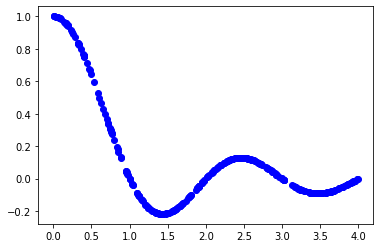

In [4]:
print("X [TREINO]: ", x.shape)
print("Y [TREINO]: ", y.shape)
print()
print("X [TESTE]: ", x_valid.shape)
print("Y [TESTE]: ", y_valid.shape)

plt.plot(x, y, 'bo')
plt.show()

In [5]:
ann = tf.keras.models.Sequential()

In [6]:
ann.add(tf.keras.layers.Dense(units=10, activation='tanh', input_dim=x.shape[1]))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

ann.add(tf.keras.layers.Dense(units=y.shape[1], activation='tanh'))

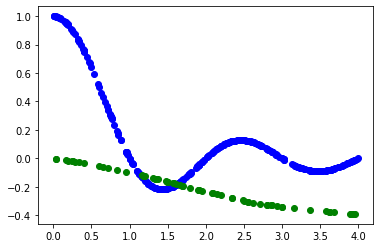

In [7]:
# treinamento
# errors_train, errors_valid = ann.fit(x, y, x_valid, y_valid, batch_size=1, epochs=500, verbose=50, accuracy=False)
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(x_valid, y_valid, batch_size = 32, epochs = 100, verbose=0)

# plot_error([errors_train, errors_valid], ["Treino", "Validação"])

# calculo do erro de predição
y_pred = ann.predict(x_valid)

plt.plot(x, y, 'bo')
plt.plot(x_valid, y_pred, 'go')
plt.show()